## Prediction of Student's scores using Supervised ML

### Task 1

#### Author: Fahad Munir

This task is part of the internship with The Spark Foundation. I have been tasked to predict the percentage of marks scored by the students based on the number of study hours.

### Steps Involved:
1. Data Reading and Understanding
2. Exploratory Data Analysis
3. Building a Simple Linear Regression model
4. Model Evaluation

In [1]:
# Importing libraries and dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

%matplotlib inline



import warnings
warnings.filterwarnings("ignore")



In [2]:
# read data

std_scores = pd.read_csv("student_scores - student_scores.csv")
std_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
std_scores.shape

(25, 2)

In [4]:
std_scores.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
std_scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# find missing values

std_scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

### Exploratory Data Analysis

Visualizing the distribution of scores

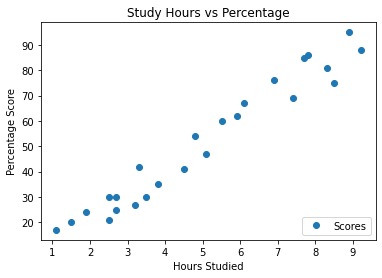

In [7]:
std_scores.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.legend(loc=4)
plt.title('Study Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

The plot suggest linearity of data. Let's see the boxplot in order to check if there is any outliers.

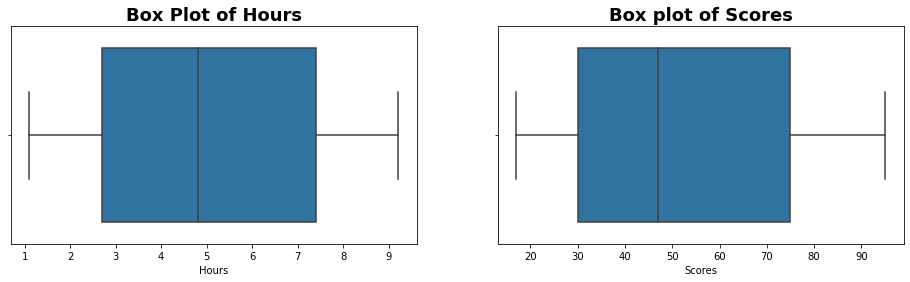

In [8]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.boxplot(x='Hours', data=std_scores)
plt.title('Box Plot of Hours', fontweight='bold', fontsize = 18)
plt.subplot(1,2,2)
sns.boxplot(x='Scores', data=std_scores)
plt.title('Box plot of Scores', fontweight='bold', fontsize = 18)

plt.show()

So we can infer there are no outliers in the dataset.

As both the features 'Hours' and 'Scores' are maintaining a linear relationship, let's find out the correlation between them.

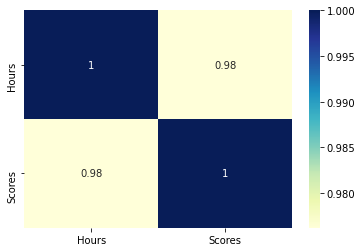

In [9]:
sns.heatmap(std_scores.corr(), cmap='YlGnBu',annot = True)

The heatmaps showing the strong positive correlation between 'Hours' and 'Scores'.

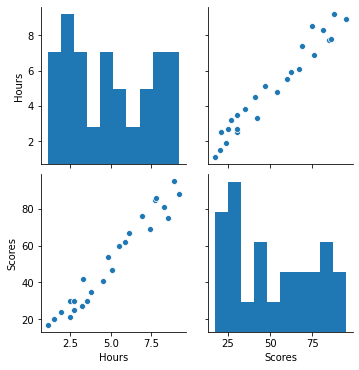

In [10]:
# pairplot visualization
sns.pairplot(std_scores)

### Modeling: Simple Linear Regression

Y = a + bX, where X is the explanatory variable and y is the dependent variable. The slope of the line is b and a is the intercept.

Scores = a + b * Hours


#### Split the dataset into train and test set

It is a good practice to to keep 70% training data and 30% test data.

In [11]:
# Creating X and Y sets
X = std_scores['Hours']
y = std_scores['Scores']

In [12]:
# Performing test train split with 70=30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)


#### Build Linear Model with StatsModel

In [13]:
import statsmodels.api as sm
#Adding Constant
x_train_sm = sm.add_constant(X_train)

lr_model = sm.OLS(y_train,x_train_sm).fit()

lr_model.params

const    1.495142
Hours    9.871714
dtype: float64

In [14]:
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Sun, 03 Jan 2021   Prob (F-statistic):           1.15e-11
Time:                        09:49:12   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

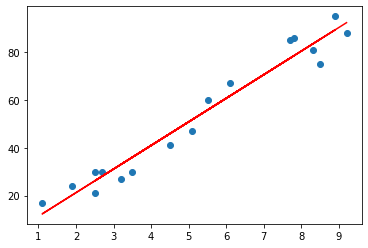

In [15]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 1.4951+9.8717*X_train, 'r')
plt.show()

#### Model training using Sklearn

In [16]:
X_train = X_train.values.reshape(-1,1)

In [17]:
lr_model_sk = LinearRegression().fit(X_train, y_train)

In [18]:
print("Intercept of Line:", lr_model_sk.intercept_)
print("Coefficient of Hours:", lr_model_sk.coef_)

Intercept of Line: 1.495142109236383
Coefficient of Hours: [9.87171443]


In [19]:
y_train_pred = lr_model_sk.predict(X_train)
r2score_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print('R2 score using sklearn model:', (r2score_train)*100)

R2 score using sklearn model: 95.70735354094693


### Residual Analysis

Purpose: To validate the assumptions of a linear regressiona model
- Error terms are normally distributed 
- The error terms should not be dependent on each other

In [20]:
# Error terms

res = y_train - y_train_pred

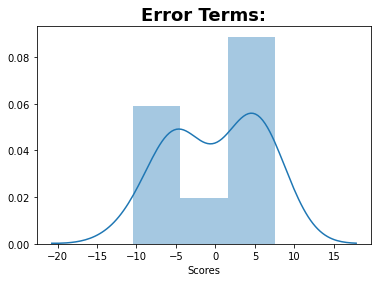

In [21]:
sns.distplot(res)
plt.title('Error Terms:', fontweight = 'bold', fontsize = 18)
plt.show()

The data is normally distributed. The distribution suggest two separate process overlapping with each other. The two groups could mean two separate group of students where left one is underprepared and right one is prepared with good scores. 

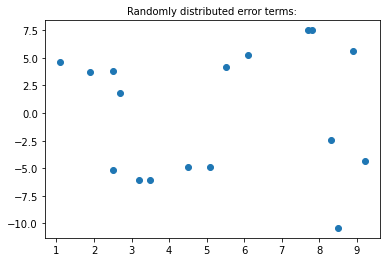

In [22]:
# Checking distributed error terms

plt.scatter(X_train, res)
plt.title('Randomly distributed error terms:', fontsize = 10)
plt.show()

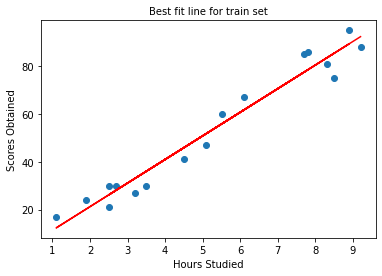

In [23]:
# Visualizing the fit on the train set

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred,'r')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Obtained')
plt.title('Best fit line for train set', fontsize = 10)
plt.show()

### Predictions on test set

Now that regression line fit on the train set, it's time to do some predictions with test set. 

#### Prediction using statsmodel

In [24]:
#Adding a constant

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [25]:
r2score = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R2 score of the test set:', r2score)

R2 score of the test set: 0.9309458862687439


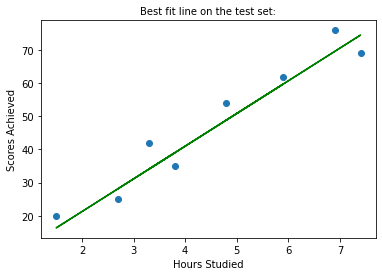

In [26]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'g')
plt.xlabel('Hours Studied')
plt.ylabel('Scores Achieved')
plt.title('Best fit line on the test set:', fontsize=10)
plt.show()

### Predicting with sklearn

In [27]:
X_test = X_test.values.reshape(-1,1)

In [28]:
y_test_pred_sklearn = lr_model_sk.predict(X_test)

In [29]:
predicted_std_score = pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred_sklearn})
predicted_std_score

,Actual,Predicted
9,25,28.148771
22,35,39.007657
13,42,34.071800
11,62,59.738257
5,20,16.302714
19,69,74.545829
23,76,69.609972
21,54,48.879371


In [32]:
r2score = r2_score(y_true = y_test, y_pred = y_test_pred_sklearn) 
print('R2_score of test set using SKlearn model:', r2score)

R2_score of test set using SKlearn model: 0.9309458862687437


#### Conclusion
R-squared of training set was 95.7% and R-squared of test set is around 93% which is acceptable. It means the model is performing well.

### Final Solution

In [36]:
## Exprected predicted score if the students study 9.25 hours/day
hours = np.array(9.25).reshape(1,-1)
pred = lr_model_sk.predict(hours)   

In [37]:
print('If the students study 9.25 hours a day they are expected to score:', pred)

If the students study 9.25 hours a day they are expected to score: [92.80850057]


##### A student studying 9.25 hours a day are expected to score 92.8 marks.